In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip install gensim

READ FILE AND ENGINEERRING FEATURE

In [0]:
import numpy as np
import gensim as gs
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import keras.models
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import math
import re
import csv






Using TensorFlow backend.


In [0]:

def read_data(filename):
    file = []
    with open(filename,encoding="utf8") as fp:
        line = fp.readline()
#         line = gs.utils.simple_preprocess(line)
        while line:
           file.append(line)
           line = fp.readline()
#            line = gs.utils.simple_preprocess(line)
    file = np.reshape(file, (len(file),1))
    fp.close()
    return file

def load_train_data(filepath, minidx, maxidx):
    filename = filepath + str(minidx) +'.txt'
    file = read_data(filename)
    data = np.array(file)
    for i in range(minidx +1 , maxidx +1 ):
        filename = filepath + str(i) +'.txt'
        file = read_data(filename)
        data = np.concatenate((data,file), axis=0)

    labels = []
    for i in range(minidx, maxidx +1):
        labels += [i]*2000

    return data, labels


def load_test_data(filepath):
    filename_1 = filepath +  'data.txt'
    file = read_data(filename_1)
    data = np.array(file)

    filename_2 = filepath + 'label.txt'
    with open(filename_2) as f:
        labels = []
        for line in f:
            labels.append(int(line))

    f.close()
    labels = np.array(labels)
    return data, labels
  
def one_hot_coding(Y,num_class):
    Y_one_hot_code = np.zeros((len(Y),num_class))
    for i in np.arange(len(Y)):
        Y_one_hot_code[i][Y[i]-1] = 1
    return Y_one_hot_code    
  
def pre_process(text):
    text = text.lower()
    # remove tags
    text = re.sub("<!--?.*?-->", "", text)
    # remove special characters and digits
    text = re.sub("(\\d|\\W)+", " ", text)
    return text

USING TF-IDF

In [0]:
def compute_TF_IDF(data_train, data_test):
    X_train = []
    X_test = []
    for doc in data_train:
        X_train.append(pre_process(doc[0]))
        
    for doc in data_test:
      X_test.append(pre_process(doc[0]))

    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    return X_train, X_test

In [0]:
data_train, labels_train = load_train_data('/content/drive/My Drive/Intership/classify_data/train/', 1, 13)
data_test, labels_test = load_test_data('/content/drive/My Drive/Intership/classify_data/test/')
# X_train, X_test = feature_engineering(data_train,data_test)
# print(X_train.shape)
# print(X_test.shape)

X_train, X_test = compute_TF_IDF(data_train, data_test)
print(X_train.shape)
print(X_test.shape)

(26000, 89947)
(6500, 89947)


In [0]:
with open('/content/drive/My Drive/Intership/.csv', 'w') as writeFile:
    writer = csv.writer(writeFile)
    for i in np.arange(X_train.shape[0]):
      writer.writerows(X_train[i])

writeFile.close()

In [0]:
print(type(X_train[1]))

<class 'scipy.sparse.csr.csr_matrix'>


In [0]:
num_class = 13
labels_train = np.array(labels_train)

labels_train = one_hot_coding(labels_train, num_class)
np.savetxt("/content/drive/My Drive/Intership/labels.csv", labels_train, delimiter=",")


In [0]:
for i in labels_train:
  print(i)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 

CLASSIFICATION WITH DNN

In [0]:
def baseline_model(X, y ):
  input_dim = X.shape[1]
  print(input_dim)
  model = Sequential()
  model.add(Dense(units=1024, activation='relu', input_dim=input_dim, name ="Input"))
  model.add(Dropout(0.3))
  model.add(Dense(units=512, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(units=13, activation='softmax'))
	# Compile model
  model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 
  model.fit(X, y, epochs = 10, batch_size = 1000)

  return model


In [0]:
if __name__  == '__main__':
    labels_train = np.array(labels_train)
    labels_test   = np.array(labels_test)
    num_class = 13
    labels_train = one_hot_coding(labels_train, num_class)
    labels_test  = one_hot_coding(labels_test, num_class)
    print(labels_train)
    model = baseline_model(X_train, labels_train)
    scores = model.evaluate(X_test, labels_test)
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


W0708 15:28:53.488209 139847997568896 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0708 15:28:53.524764 139847997568896 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 15:28:53.532163 139847997568896 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0708 15:28:53.549623 139847997568896 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0708 15:28:53.560422 

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
89947


W0708 15:28:53.640352 139847997568896 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0708 15:28:53.755442 139847997568896 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
26000/26000 [==============================] - 19s 728us/step - loss: 1.3937 - acc: 0.7626
Epoch 2/10
26000/26000 [==============================] - 13s 509us/step - loss: 0.2889 - acc: 0.9080
Epoch 3/10
26000/26000 [==============================] - 13s 506us/step - loss: 0.1259 - acc: 0.9632
Epoch 4/10
26000/26000 [==============================] - 13s 507us/step - loss: 0.0673 - acc: 0.9799
Epoch 5/10
26000/26000 [==============================] - 13s 506us/step - loss: 0.0469 - acc: 0.9863
Epoch 6/10
26000/26000 [==============================] - 13s 510us/step - loss: 0.0387 - acc: 0.9876
Epoch 7/10
26000/26000 [==============================] - 13s 510us/step - loss: 0.0339 - acc: 0.9888
Epoch 8/10
26000/26000 [==============================] - 13s 517us/step - loss: 0.0292 - acc: 0.9907
Epoch 9/10
26000/26000 [==============================] - 13s 507us/step - loss: 0.0280 - acc: 0.9909
Epoch 10/10
6500/6500 [==============================] - 3s 520us/step

acc: 88.86

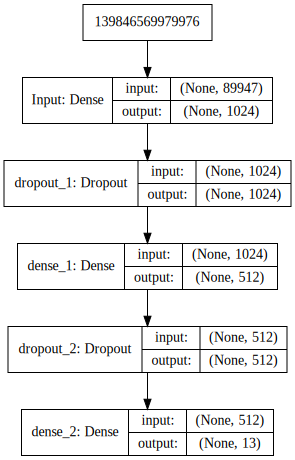

In [0]:
  SVG(model_to_dot(model, show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))


IMPLEMENT SVM WITH LIBRARY

In [0]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train, labels_train)
print('Best score for training data:', svm_model.best_score_,"\n") 
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

In [0]:
if __name__  == '__main__':
    y_train = np.array(labels_train)
    y_test   = np.array(labels_test)
    num_class = 13
#     labels_train = one_hot_coding(labels_train, num_class)
#     labels_test  = one_hot_coding(labels_test, num_class)
    svm_model = SVC(kernel="linear", C=100).fit(X_train, y_train)
    score = svm_model.score(X_test, y_test)
    print("\n %.2f%%" % (score*100))


 88.65%


IMPLEMENT SVM WITH NUMPY


In [0]:
def  computed_dW(W,X,y,reg):
    d, C = W.shape;
    N = X.shape[0];
    loss = 0;
    dW = np.zeros((d,C))
    id0 = np.arange(N);
    Z = X.dot(W);
    correct_core =  Z[id0,y].reshape(N,1);
    margins = np.maximum(0, Z - correct_core +1);
    margins[id0,y] = 0;
    loss = np.sum(margins);
    loss /= N;
    loss += 0.5*reg*np.sum(W*W);

    F = (margins>0).astype(int);
    id1 = np.arange(F.shape[0])
    F[id1,y] = np.sum(-F,axis=1);
    dW = X.T.dot(F)/N + reg*W;
    return loss, dW

In [0]:
def classify_svm(X,y, W, reg,lr =0.1, batch_size = 1000, epochs = 10):
    W =W;
    num_iters = int(X.shape[0]/batch_size)
    for epoch in np.arange(epochs):
      loss_history= [];
      print("Epochs : {}".format(epoch + 1))
      X, y = shuffer_data(X,y)
      for it in np.arange(num_iters):
          start = it*batch_size
          end = (it+1)*batch_size
          X_batch = X[start:end];
          y_batch = y[start:end];
          loss, dW = computed_dW(W,X_batch,y_batch,reg)
          loss_history.append(loss);
          W -= lr*dW;
          if it% 200 ==0 :
              print('it %d/%d, loss = %f' %(it, num_iters, loss_history[it]));
    return W, loss_history



In [0]:
def shuffer_data(X,y):
    N = X.shape[0]
    permutation = np.random.permutation(N)
    x_shuffer = X[permutation]
    y_shuffer = y[permutation]
    return x_shuffer, y_shuffer

In [0]:
def predict(W,X):
    Z = X.dot(W);
    return np.argmax(Z,axis=1);

def evaluate(W, X, y):
    y_pred = predict(W,X);
    acc = 100*np.mean(y_pred == y);
    return acc

In [0]:
if __name__  == '__main__':
    y_train = np.array(labels_train)
    y_test   = np.array(labels_test)
    print(y_train.shape)
    y_train -= 1
    y_test   -= 1
    num_class = 13
  
    W_init = np.ones((X_train.shape[1],num_class))
    W, loss = classify_svm(X_train ,y_train, W_init, reg = 0.01 ,lr = 0.1, batch_size = 100, epochs =5)
    acc = evaluate(W, X_test, y_test)
    print(acc)